# Plots and interfaces

In this section, we review the visual aids provided by $LiMe$, as well as, some tips on how to adjust them to your workflow. If you have any issues with visualizing your data with $LiMe$, please contact the author or [open an issue](https://github.com/Vital-Fernandez/lime/issues).

LiMe features a composite software design, utilizing instances of other classes to implement its desired functionality. This approach is akin to that of IRAF: Functions are organized into multi-level packages, which users access to perform the desired operations. The diagram in Fig.1 outlines this workflow.

<img src="../images/LiMe_structure.png" width="1200" />

As you can see there are two kind of plots
* The functions under the ``.plot`` attribute are standard [matplotlib](https://matplotlib.org/) plots. By default the plots will be displayed unless the user provides an ``output_address`` in which case the plot will be saved.
* The functions under the ``.check`` attribute are interactive [matplotlib](https://matplotlib.org/) plots. The user usually needs to provide an ``output_address`` where the new data selection is stored.  

## Adjusting the figures format

### 1) Plotting functions configuration

Let's start by getting the data from the [third tutorial](https://lime-stable.readthedocs.io/en/latest/tutorials/n_tutorial3_complete_spectrum.html):

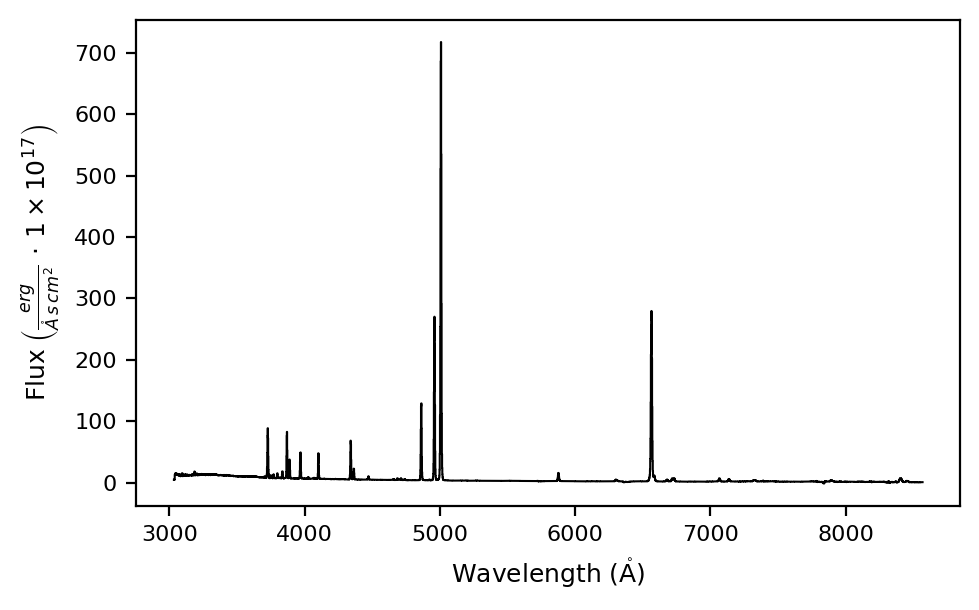

In [1]:
import lime

# State the data files
obsFitsFile = '../sample_data/spectra/gp121903_osiris.fits'
lineBandsFile = '../sample_data/osiris_bands.txt'
cfgFile = '../sample_data/osiris.toml'

# Load configuration
obs_cfg = lime.load_cfg(cfgFile)
z_obj = obs_cfg['sample_data']['z_array'][2]
norm_flux = obs_cfg['sample_data']['norm_flux']

# Declare LiMe spectrum
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)
gp_spec.plot.spectrum(rest_frame=True)

In the ``.plot`` and ``.check`` functions you can use the ``fig_cfg`` and ``ax_cfg`` arguments to adjust the figure labels and format:

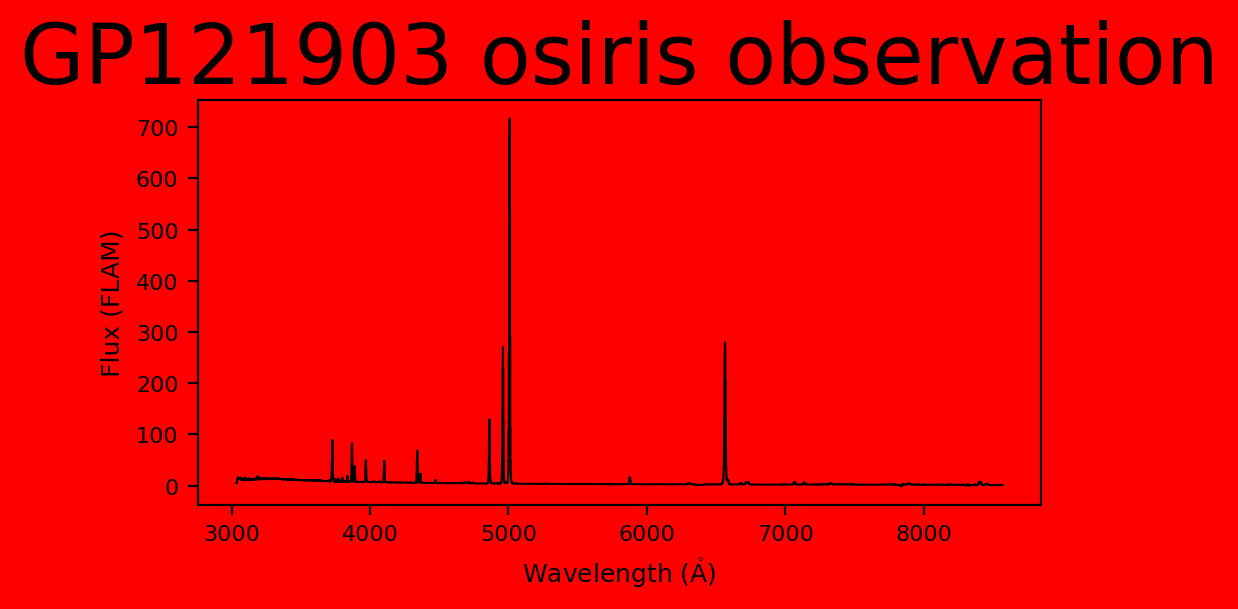

In [2]:
ax_cfg = {'title': 'GP121903 osiris observation', 'ylabel':'Flux (FLAM)'}
fig_cfg = {"axes.titlesize" : 30, "figure.facecolor": "red", "axes.facecolor": "red"}
gp_spec.plot.spectrum(rest_frame=True, ax_cfg=ax_cfg, fig_cfg=fig_cfg)

### 2) Global configuration functions configuration

Additionally, you can adjust the overall format calling the ``lime.themer`` funtion:

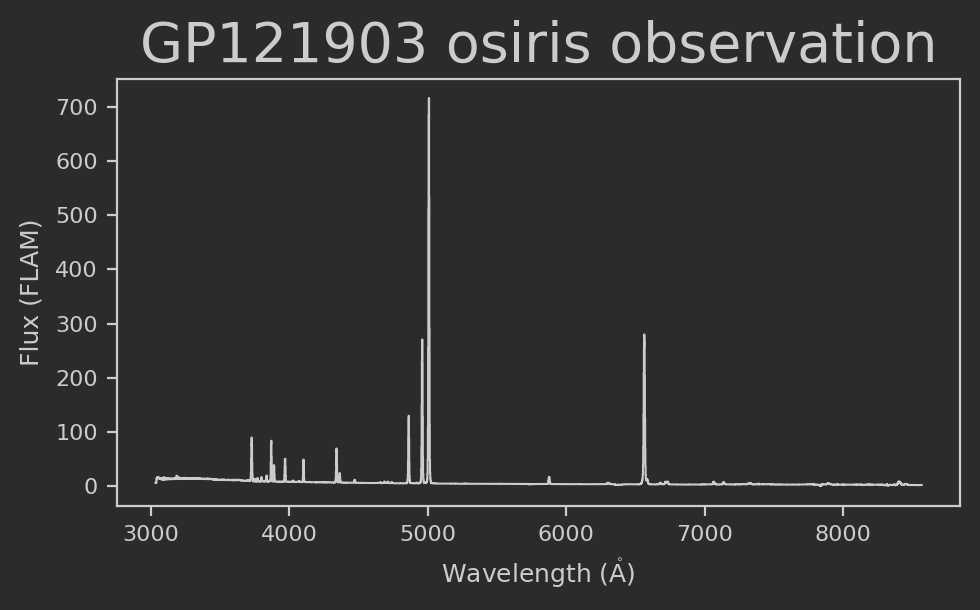

In [3]:
lime.theme.set_style(style='dark', fig_cfg={"axes.titlesize" : 20})

gp_spec.plot.spectrum(rest_frame=True, ax_cfg=ax_cfg)


### 3) Changing the default values

If you have access to the $LiMe$ installation folder, you can change the default values for the figures format. This file is called ``config.toml`` and it should be located at:

In [4]:
from lime.io import _LIME_FOLDER

print(_LIME_FOLDER/'config.toml')

/home/vital/PycharmProjects/lime/src/lime/config.toml


This file has a .toml format where the plotting parameters can be found on the matplotlib and colors sections:

In [5]:
lime_cfg = lime.load_cfg(_LIME_FOLDER/'config.toml')
lime_cfg

{'metadata': {'name': 'lime-stable', 'version': '1.0.4'},
 'colors': {'default': {'bg': '#FFFFFF',
   'fg': '#000000',
   'cont_band': '#8c564b',
   'line_band': '#b5bd61',
   'color_cycle': ['#279e68',
    '#d62728',
    '#aa40fc',
    '#8c564b',
    '#e377c2',
    '#7f7f7f',
    '#b5bd61',
    '#17becf',
    '#1f77b4',
    '#ff7f0e'],
   'match_line': '#b5bd61',
   'peak': '#aa40fc',
   'trough': '#7f7f7f',
   'profile': '#1f77b4',
   'cont': '#ff7f0e',
   'error': '#FF0000',
   'mask_map': 'viridis',
   'comps_map': 'Dark2',
   'mask_marker': '#FF0000',
   'inspection_positive': '#FFFFFF',
   'inspection_negative': '#ff796c',
   'fade_fg': '#CCCCCC',
   'single_width': '1',
   'comp_width': '0.75',
   'err_width': '2',
   'cont_width': '0.5',
   'spectrum_width': '0.75'},
  'dark': {'bg': '#2B2B2B',
   'fg': '#CCCCCC',
   'cont_band': '#e7298a',
   'line_band': '#8fff9f',
   'color_cycle': ['#66c2a5',
    '#fc8d62',
    '#e68ac3',
    '#a6d854',
    '#ffd92f',
    '#e5c494',
    '#8

If you need to restore the default values from this file, you can find it [in the github](https://github.com/Vital-Fernandez/lime/blob/master/src/lime/config.toml).

## Jupyter notebooks and interactive shells

$LiMe$ functions should work in any IDE (Integrated Developement Environment) including [Jupyter Notebooks](https://jupyter.org/). This tutorial can be found as a notebook in the Github [examples/outputs](https://github.com/Vital-Fernandez/lime/tree/master/examples/inputs) folder. 

However, many of $LiMe$ interactive plots cannot be easily used within a notebook even with the ``%matplotlib widget``command. 

It is recommended to install the [Pyqt](https://www.riverbankcomputing.com/software/pyqt/) library and use the ``%matplotlib qt``. This will display the matplotlib plots in a new window making it easier to interact.